In [620]:
import numpy as np
from biosppy.signals import emg
from biosppy import plotting
import matplotlib.pyplot as plt

In [621]:
import fileinput
for line in fileinput.FileInput("output2.txt",inplace=1):
    if line.replace("\n",""):
        print(line)

In [622]:
signal = np.loadtxt('output2.txt')

In [623]:
signal.size

8197

**If the Baud Rate is 9600 what is our sampling rate. It cant be 9.6khz because we only have 8,197 data points over the 30+ seconds we were collecting data. 9600 baud rate tranlates to 960 bytes per second which could be more accurate. It is also the only way to see a basic onset of a signal.**


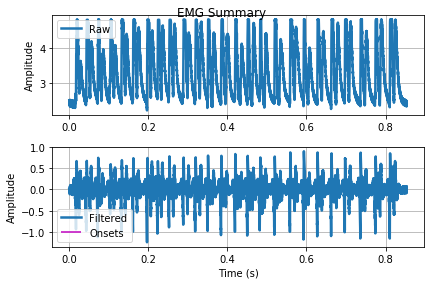

In [624]:
out = emg.emg(signal=signal, sampling_rate=9600, show=True)

In [625]:
out['onsets']

array([], dtype=int64)

In [626]:
out

ReturnTuple(ts=array([0.00000000e+00, 1.04153959e-04, 2.08307918e-04, ...,
       8.53437538e-01, 8.53541692e-01, 8.53645846e-01]), filtered=array([ 0.00490727, -0.00064395, -0.00621192, ...,  0.07434896,
       -0.0423534 , -0.0088319 ]), onsets=array([], dtype=int64))

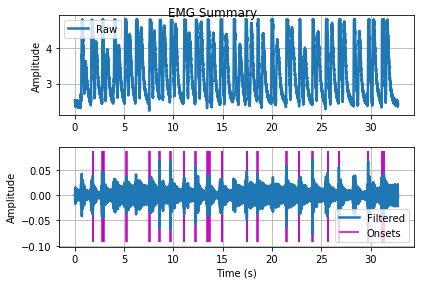

In [627]:
out2 = emg.emg(signal = signal, sampling_rate=250, show=True)

In [628]:
signal2 = np.loadtxt('secout.txt')

In [629]:
signal2.size

2848

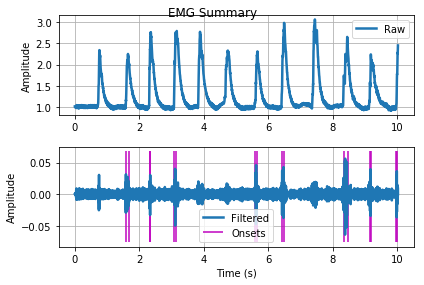

In [630]:
out2 = emg.emg(signal = signal2, sampling_rate=284, show=True)

In [631]:
onset = emg.find_onsets(signal = signal2, sampling_rate=284)

In [632]:
onset


ReturnTuple(onsets=array([ 665,  679,  887,  912, 1100, 1115, 1836, 1858, 2105, 2140, 2402,
       2404]))

In [633]:
movesignal = np.loadtxt('moveout.txt')
movesignal.size

2854

In [634]:
restsignal = np.loadtxt('flatout.txt')
restsignal.size

2850

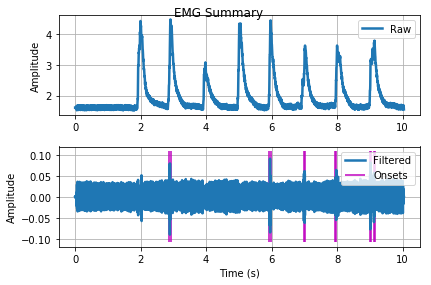

In [635]:
out3 = emg.emg(signal = movesignal, sampling_rate=284, show=True)

In [636]:
ts = out3['ts']
filtered = out3['filtered']

In [700]:
twosignal = emg.hodges_bui_onset_detector(signal = filtered, rest = restsignal, sampling_rate = 284, size = 4, threshold = .05)

In [701]:
processed = twosignal['processed']


In [702]:
y = twosignal['onsets']
y

array([   9, 1479, 1974, 1975, 2055, 2568, 2570])

In [703]:
#x = np.arange(2840)
#x

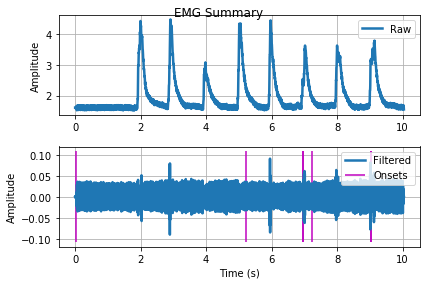

In [704]:
plotting.plot_emg(ts = ts, sampling_rate = 284, raw = movesignal, filtered = filtered, onsets = y, show = True)

In [710]:
londrelsignal = emg.londral_onset_detector(signal = movesignal, rest = restsignal, sampling_rate = 284, size = 1, threshold = .05, active_state_duration = 1)


In [711]:
londrelsignal

ReturnTuple(onsets=array([], dtype=float64), processed=array([0., 0., 0., ..., 0., 0., 0.]))

IndexError: arrays used as indices must be of integer (or boolean) type

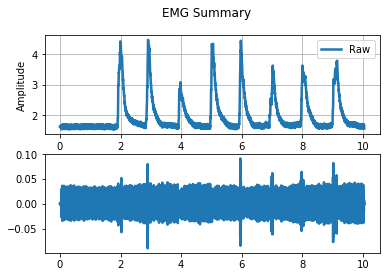

In [712]:
plotting.plot_emg(ts = ts, sampling_rate = 284, raw = movesignal, filtered = filtered, onsets = londrel_onset, show = True)